<a href="https://colab.research.google.com/github/sbowma15/face_and_skin_detection/blob/main/face_and_skin_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

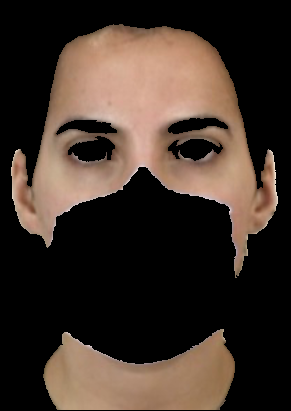

IndexError: ignored

In [ ]:
import cv2 as cv
import sys
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from scipy.signal import convolve2d



# Get user supplied values
image1 = cv.imread("/content/sample_data/familyFun.jpg")
image2 = cv.imread("/content/sample_data/familyFun.jpg")
cascPath ='/content/sample_data/haarcascade_frontalface_default.xml'


# Create the haar cascade
faceCascade = cv.CascadeClassifier(cascPath)

# Read the image
#gray1 = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)
#gray2 = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)

# Detect faces in the image
face1 = faceCascade.detectMultiScale(
    image1,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30)
)
face2 = faceCascade.detectMultiScale(
    image2,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
)
#print("Found {0} faces!".format(len(face1)))
#print("Found {0} faces!".format(len(face2)))

# Draw a rectangle around the faces

#for (x, y, w, h) in face1:
#    cv.rectangle(image1, (x, y-40), (x+w, y+h+80), (0, 255, 0), 2)
#    cut1 =image1[y-40:y+h+80,x:x+w,:]
#    #cv.imwrite("cut1.png",cut1)
#    plt.figure()
    #plt.title('hi')
    #plt.imshow(cv.cvtColor(cut1,cv.COLOR_BGR2RGB))


#for (x, y, w, h) in face2:
#    cv.rectangle(image2, (x, y-40), (x+w, y+h+80), (0, 255, 0), 2)
#    cut2 =image2[y-40:y+h+80,x:x+w,:]
#    cv.imwrite("cut2.png",cut2)
#    plt.figure()
#    plt.title('hi')
#    plt.imshow(cv.cvtColor(cut2,cv.COLOR_BGR2RGB))

#####################################################3
#Passing original familyFun img through to skin detector
###################################################

def skin_rgb_threshold( cut1 ):
  #Extract color channels and save as SIGNED integers
  #Need the extra width for extraction
  #the numpy function, "np.int16" along with "astype()" converts the values into
  #a 16 point integer value
    b = cut1[:,:,0].astype(np.int16)
    g = cut1[:,:,1].astype(np.int16)
    r = cut1[:,:,2].astype(np.int16)

#This is the skin mask we went over in the video, The idea is to first find the
#areas of where red, green, and blue values are within the boundaries set
    skin_mask = ((r > 96) & (g > 40) & (b > 10)
#this will make sure that the difference between the maxes and minimums of the
#photo are not more than 15 unit values away from eachother.
              &((cut1.max()-cut1.min())>15)
#Now the absolute value is taken from the difference of the red and green values
#The absolute of the difference is compared to the maximum in differences which
#is 15 unit values, and where red is greater than green and blue pixel values
              &(np.abs(r-g)>15) & (r > g) & (r > b))

#This will return the src image with only the specified pixel values found to be
#overlapped with the original image pixel values
    return cut2 * skin_mask.reshape(skin_mask.shape[0], skin_mask.shape[1],1)

#call to "skin_rgb_threshold" with the "face_good.bmp" image passed in as "src1"
#Return placed in "skin" and displayed below using "cv2_imshow"
skin = skin_rgb_threshold(cut2)

#skin = cv.medianBlur(skin, 21)
cv2_imshow(skin)

merge = np.zeros(skin.shape, "uint8")
for i in range(skin.shape[0]):
     for j in range(skin.shape[1]):
          merge[i,j,:] = skin[i,j,:]
          if np.sum(skin[i,j,:]) == 0:
            merge[i,j,:] = cut1[i,j,:]

cv2_imshow(merge)
blurredMerge = cv.medianBlur(merge, 9)

cv2_imshow(blurredMerge)





